## Final Project Submission

Please fill out:
* Student name: NORAH OLUOCH
* Student pace: self paced / part time / full time:  PART TIME
* Scheduled project review date/time: 19 JULY 2024
* Instructor name: SAMUEL MWANGI
* Blog post URL:


## Introduction
This project aims to understand how statistical analysis and machine learning techniques to uncover the relationships between house features and their prices using linear regession models. The dataset includes various attributes such as the number of bedrooms, bathrooms, square footage, grade, and condiion. By exploring these features, we aim to predict house prices and provide recommendations for maximizing property value during renovations.

## Objectives
#### To Determine which features are most relevant to house pricing
#### To compare the relation between building aspects and prices
#### To costruct regression models with various features and to validate with r2_squared

## Business Problem (problem statement)
 The decision to renovate a home can be pivotal, influencing its market appeal, sale price, and ultimately, its overall value. For homeowners looking to optimize their property's potential before listing it for sale, there is need to provide advice to homeowners about how home renovations might increse the estimated value of their homes an by what amount
 

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [222]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [223]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [224]:
# drop columns by index position
columns_to_drop = [1,9,12,13,15,16,17,18,19,20]
df.drop(df.columns[columns_to_drop], axis=1, inplace=True)
df.head()


id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  condition  grade  yr_built  
0         NaN          3      7      1955  
1         0.0          3      7      1951  
2         0.0          3      6      1933  
3         0.0          5      7      1965  
4         0.0          3      8      1987

### Column Names and description


#### id - unique identified for a house          
#### price -is prediction target
#### bedroomsNumber -  of Bedrooms/House
#### bathroomsNumber -  of bathrooms/bedrooms
#### sqft_lotsquare -  footage of the lot
#### floorsTotal -  floors (levels) in house
### waterfront - House which has a view to a waterfront
#### condition - How good the condition is ( Overall )
#### grade - overall grade given to the housing unit, based on King County grading system
#### yr_built - Built Year

## EDA Data and cleaning


In [225]:
# shape of our dataframe
df.shape

(21597, 11)

##### Number of columns(variables) - 11
##### Number of rows(observations) -  21597 

#### Data description of numerical values

In [226]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront     condition         grade  \
count  2.159700e+04  21597.000000  19221.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      3.409825      7.657915   
std    4.141264e+04      0.539683      0.086825      0.650546      1.173200   
min    5.200000e+02      1.000000      0.000000      1.000000      3.000000   
25%    5.040000e+03      1.000000      0.000000      3.000000      7.000000   
50%    7.618000e+03      1.500000      0.000000      3.000000      7.000000   
75%    1.068500e+04      2.000000      0.000000      4.000000      8.000000   
max    1.651359e+06      3.500000      1.000000      5.000000     13.000000   

           yr_built  
count  21597.000000  
mean    1970.999676  
std       29.375234  
min     1900.000000  
25%     1951.000000  
50%     1975.000000  
75%     1997.000000  
max     2015.000000

#### data info

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  float64
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


#### Null values


In [228]:
# looking for null values
df.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [229]:
# Let's find correlation between waterfront feature and the price
correlation = df['waterfront'].corr(df['price'])
correlation

0.27629538393525727

Waterfront is the only feature with null values and threfore its an outlier and can cause an impact on the price

In [230]:
# Removing/droping a waterfront feature asto remove an outlier
columns_to_drop = ['waterfront']  
df.drop(columns=columns_to_drop, inplace=True)
df.head(3)

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   

   condition  grade  yr_built  
0          3      7      1955  
1          3      7      1951  
2          3      6      1933

In [231]:
# checking for null values
df.isna().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
condition      0
grade          0
yr_built       0
dtype: int64

## Data visualizations

#### Pair plot

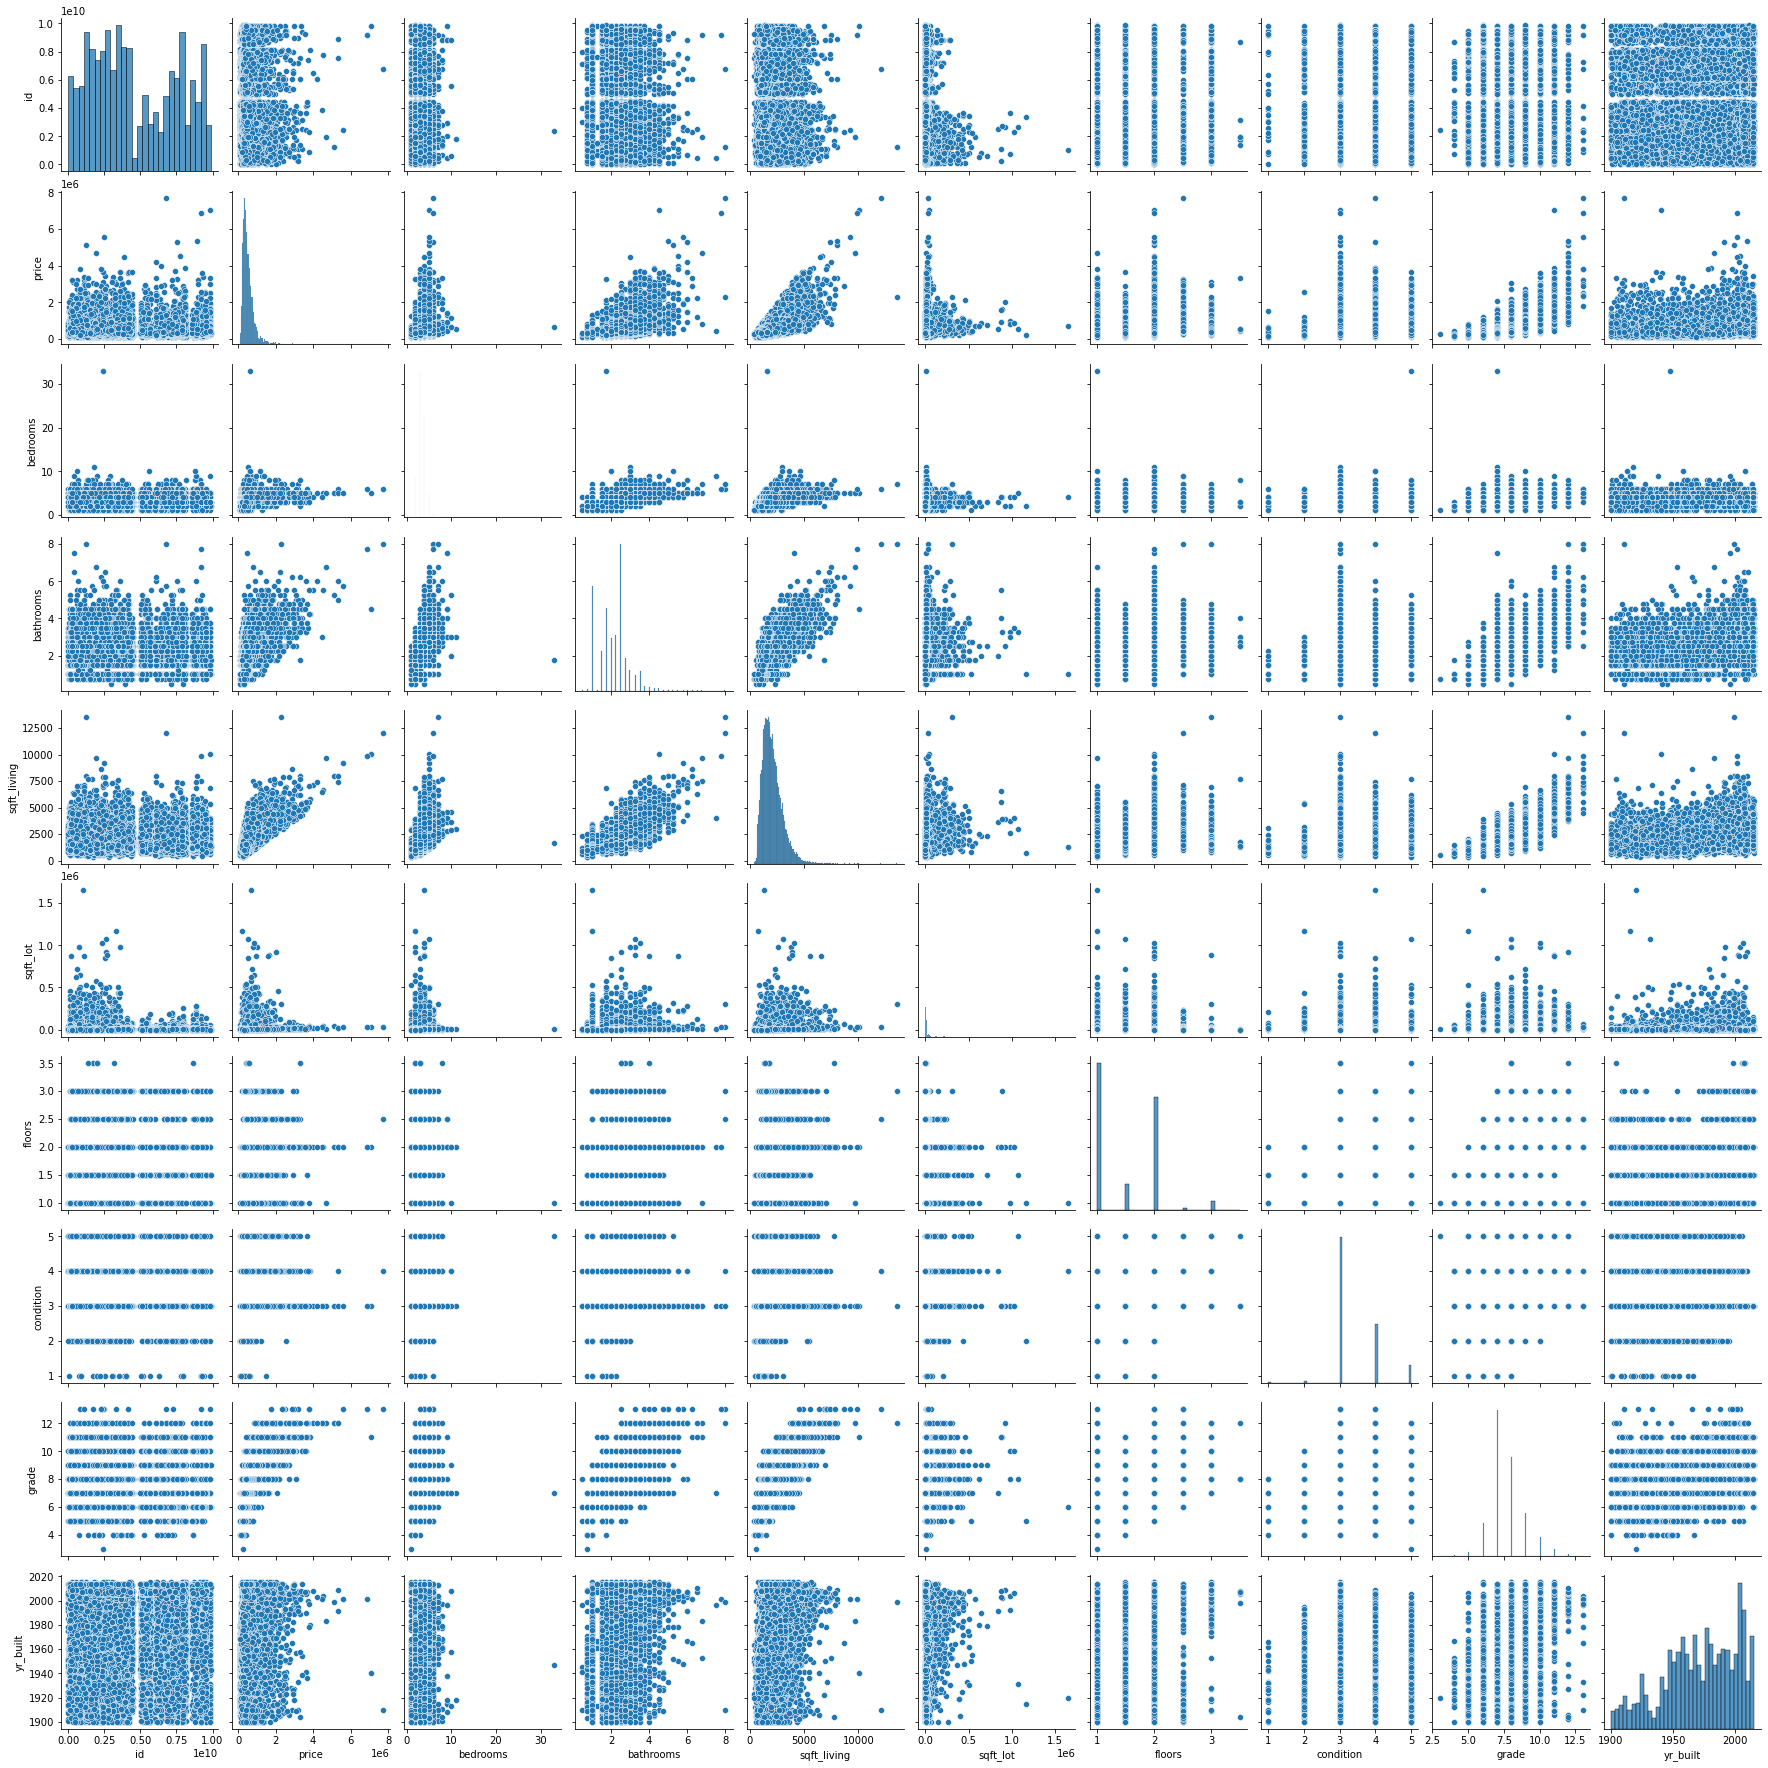

In [ ]:
sns.pairplot(data=df)


#### Correlation HeatMap

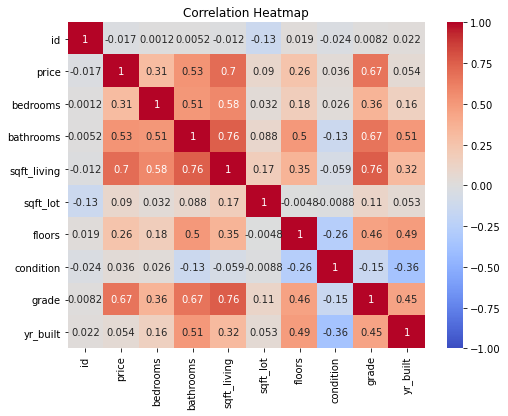

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

#### Feature selection

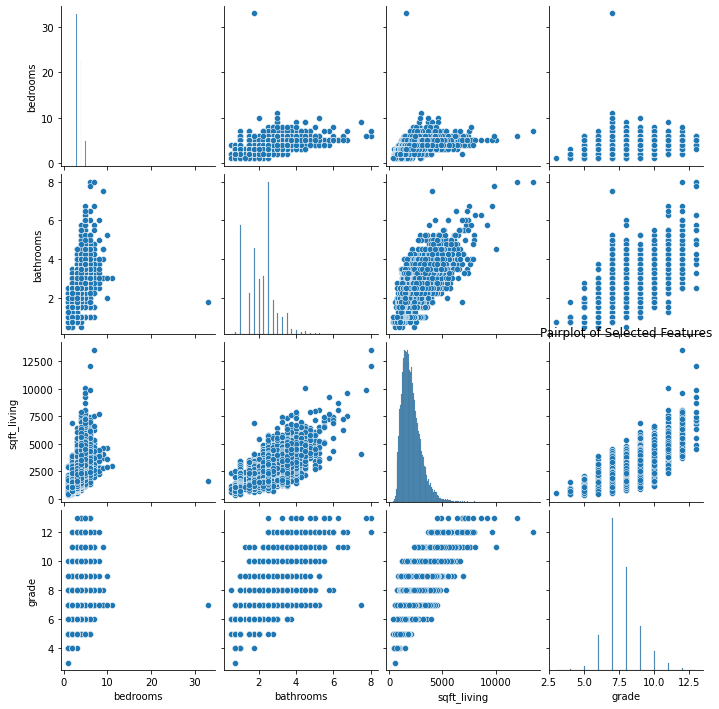

In [ ]:
# Features to be selected from the heatmap
# with high correlation coefficient (bedrooms= 0.31,bathrooms = 0.53,sqft_living = 0.7,grade = 0.67) with target(price) 
selected_features =['bedrooms', 'bathrooms', 'sqft_living', 'grade']
sns.pairplot(df[selected_features])
plt.title('Pairplot of Selected Features')
plt.show()

#### Checking for outliers

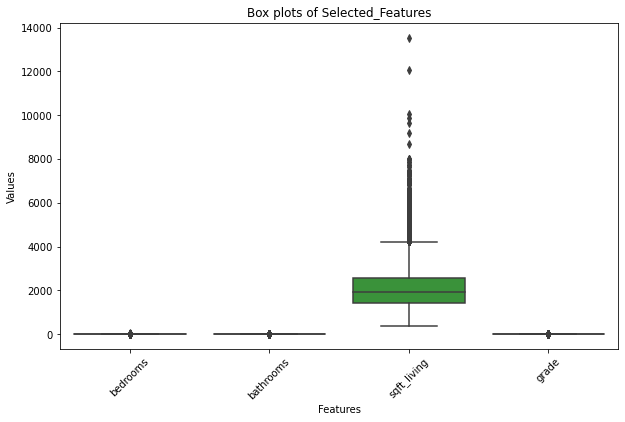

In [ ]:
# plotting for box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[selected_features])
plt.title('Box plots of Selected_Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

#### from the above visualization outliers seem to be present in every feature, which shows there is positive correlation and they have a pricing impact on the housing.

#### Get/remove the outliers

In [234]:
# Calculate IQR for selected columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Print indices of outliers
outlier_indices = df.index[outliers]
df = df.drop(outlier_indices)

#### Check for duplicates

## Modeling

#### Features assigned for modeling

Selected features are the Predictors (X- independent variable), 
Price is the target (Y-variable)

In [ ]:
X = df[['sqft_living','grade','bathrooms','bedrooms']]
Y = df[['price']]

#### Test train split

In [ ]:
df = X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Data scaling

In [238]:
#From model assumptions , data is supposed to be without null values or oultliers and also scaled with#
#a normal distribution the below code perfoms data scaling since all of the assumptions have already been met
scaler = StandardScaler()
data_scaler = StandardScaler()
x_train_scaled = data_scaler.fit_transform(X_train)
x_test_scaled = data_scaler.transform(X_test)

#### modeling

In [ ]:
model = LinearRegression()

In [239]:
# training the model
model.fit(x_train_scaled,Y_train)

LinearRegression()

In [240]:
y_pred = model.predict(x_test_scaled)

In [242]:
X = df[['sqft_living','grade','bathrooms','bedrooms']]
Y = df[['price']]
y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
r2  = r2_score(Y_test,y_pred)
print("mse",mse)
print("mae",mae)
print("R2" ,r2)
print("mean difference of ", y_pred.mean()-Y.mean())

mse 22206591708.64743
mae 118132.71384276674
R2 0.37306291927959667
mean difference of  price    8712.016819
dtype: float64


R2 = 37.3% which is low

In [243]:
X = df[['sqft_living','grade','bathrooms']]
Y = df[['price']]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
data_scaler = StandardScaler()
x_train_scaled = data_scaler.fit_transform(x_train)
x_test_scaled = data_scaler.transform(x_test)
model_TWO =LinearRegression()
model_TWO.fit(x_train_scaled,y_train)
y_pred = model_TWO.predict(x_test_scaled)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)
print("mse",mse)
print("mae",mae)
print("R2" ,r2)
print("mean difference of", y_pred.mean()-Y.mean())

mse 21351984886.091427
mae 118474.8481111486
R2 0.32822545096273215
mean difference of price    2183.680664
dtype: float64


R2 = 32.8% which is low

In [244]:
X = df[['sqft_living','bathrooms','bedrooms']]
Y = df[['price']]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
data_scaler = StandardScaler()
x_train_scaled = data_scaler.fit_transform(x_train)
x_test_scaled = data_scaler.transform(x_test)
model_THREE =LinearRegression()
model_THREE.fit(x_train_scaled,y_train)
y_pred = model_THREE.predict(x_test_scaled)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)
print("mse",mse)
print("mae",mae)
print("R2" ,r2)
print("mean difference of", y_pred.mean()-Y.mean())

mse 23386828908.089672
mae 125027.60050696577
R2 0.26420534077009705
mean difference of price    284.379252
dtype: float64


R2 = 26.4% which is low